# Lending Club Case Study

## Data Sourcing

In [21]:
#importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [22]:
#read data
loan = pd.read_csv("loan.csv")

In [23]:
# display all rows
pd.set_option('display.max_rows', None)

In [24]:
#number of rows and column
loan.shape

(39717, 111)

In [25]:
#displaying few rows of data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [26]:
#checking datatypes of columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Data Cleaning

Removing the columns with all null values as they are of no use.

In [27]:
#removing columns with all null values
null_columns = loan.columns[loan.isna().all()].tolist()
loan = loan.drop(null_columns, axis=1)

In [28]:
#checking number of columns remaining
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Removing the columns with only one unique value as it will not be useful in analysis.

In [29]:
# removing columns that have only one unique value
one_unique_value_column = loan.columns[loan.nunique() <= 1]
loan = loan.drop(one_unique_value_column, axis=1)

In [30]:
#checking the no.of null values in each column
null_count = loan.isnull().sum()
print(null_count)

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   


Removing the column with null values more than 2000 as filling those values could give a false analysis of the data.


In [31]:
#removing columns with null values more than 2000 
more_null = loan.isnull().sum() > 2000
more_null_drop = loan.columns[more_null]
loan = loan.drop(more_null_drop, axis=1)

In [32]:
#checking no.of unique values in each column
unique_value_count = loan.nunique()
print(unique_value_count)

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp 


Removing the columns with unique values more than 10000 as it would make the data complex and causing scaling issue.


In [33]:
#removing columns with unique values more than 10000
more_unique_values = loan.nunique() > 10000
more_unique_values_drop = loan.columns[more_unique_values]
loan = loan.drop(more_unique_values_drop, axis=1)

In [34]:
#displaying the remaining columns
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')



Removing the columns that will not be useful for the defaulting analysis as these columns are data after the loan is issued and some of the columns don't contribute to the analysis.


In [35]:
#dropping the columns not useful for our analysis
loan = loan.drop(['last_credit_pull_d','pub_rec_bankruptcies', 'zip_code','addr_state','out_prncp_inv','funded_amnt','delinq_2yrs','out_prncp','total_rec_prncp','total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1)

In [36]:
#checking the no.of rows and columns remaining
loan.shape

(39717, 20)


Removing the rows with current in loan status as they have already got the loan and the data is not helpful in finding defaultor 
behaviour analysis.


In [37]:
#removing the rows that has loan status as current
loan = loan.loc[lambda x: x['loan_status'] != "Current"]

## Missing Data

In [38]:
#checking the percentage of null values in each column
(loan.isna().sum()/len(loan.index))*100
    

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64


Only two columns have missing data emp_length and revol_util and missing percentage is less than 3%. So we can remove the rows with missing data as it wouldn't affect much in the analysis.



In [39]:
#removing the missing rows in columns emp_length and revol_util
missing_rows = loan[['emp_length', 'revol_util']].notna().all(axis=1)
loan = loan.loc[missing_rows]

## Standardization of Data Types

In [40]:
#checking the datatypes of columns to standardize
loan.dtypes

loan_amnt                int64
funded_amnt_inv        float64
term                    object
int_rate                object
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
dtype: object

In [41]:
#standardizing the datatypes of columns
loan['term'] = loan['term'].astype('category')
loan['int_rate'] = loan['int_rate'].astype('str')
loan['int_rate'] = loan['int_rate'].str.replace('%', '').astype('float').round(2)
loan['grade'] = loan['grade'].astype('category')
loan['sub_grade'] = loan['sub_grade'].astype('category')
loan.emp_length = loan.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0'))
loan['home_ownership'] = loan['home_ownership'].astype('category')
loan['verification_status'] = loan['verification_status'].astype('category')
loan['loan_status'] = loan['loan_status'].astype('category')
loan['purpose'] = loan['purpose'].astype('category')
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')


Creating New Columns from Existing Columns

In [42]:
#creating new columns from available columns
loan['issue_year'] = pd.DatetimeIndex(loan['issue_d']).year
loan['issue_month'] = pd.DatetimeIndex(loan['issue_d']).month

In [43]:
#rechecking the datatypes after standardization
loan.dtypes

loan_amnt                       int64
funded_amnt_inv               float64
term                         category
int_rate                      float64
grade                        category
sub_grade                    category
emp_length                     object
home_ownership               category
annual_inc                    float64
verification_status          category
issue_d                datetime64[ns]
loan_status                  category
purpose                      category
dti                           float64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_util                     object
total_acc                       int64
issue_year                      int32
issue_month                     int32
dtype: object

In [44]:
#displaying few no.of rows and columns for sample check
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_year,issue_month
0,5000,4975.0,36 months,10.65,B,B2,10,RENT,24000.0,Verified,...,credit_card,27.65,Jan-85,1,3,0,83.70%,9,2011,12
1,2500,2500.0,60 months,15.27,C,C4,0 year,RENT,30000.0,Source Verified,...,car,1.00,Apr-99,5,3,0,9.40%,4,2011,12
2,2400,2400.0,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,...,small_business,8.72,Nov-01,2,2,0,98.50%,10,2011,12
3,10000,10000.0,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,...,other,20.00,Feb-96,1,10,0,21%,37,2011,12
5,5000,5000.0,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,...,wedding,11.20,Nov-04,3,9,0,28.30%,12,2011,12


## Outliers 

<Axes: >

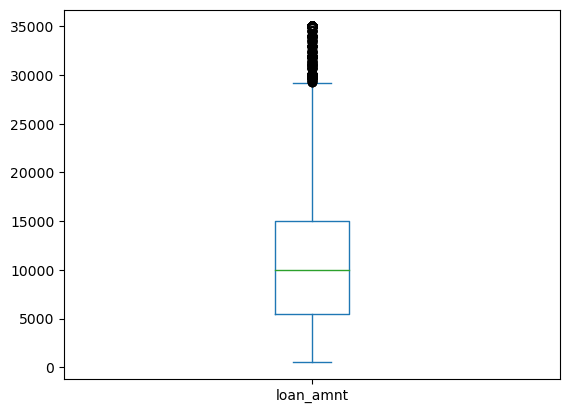

In [45]:
#checking for outliers using boxplot for loan_amnt
loan['loan_amnt'].plot.box()

<Axes: >

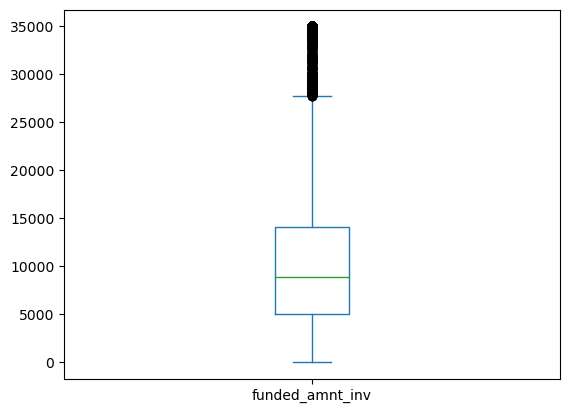

In [46]:
#checking for outliers using boxplot for funded_amnt_inv
loan['funded_amnt_inv'].plot.box()

<Axes: >

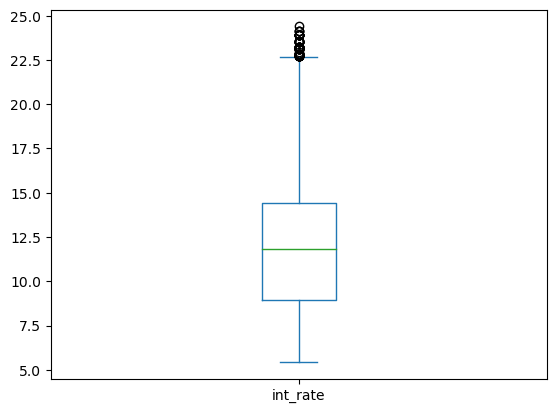

In [48]:
#checking for outliers using boxplot for int_rate
loan['int_rate'].plot.box()

<Axes: >

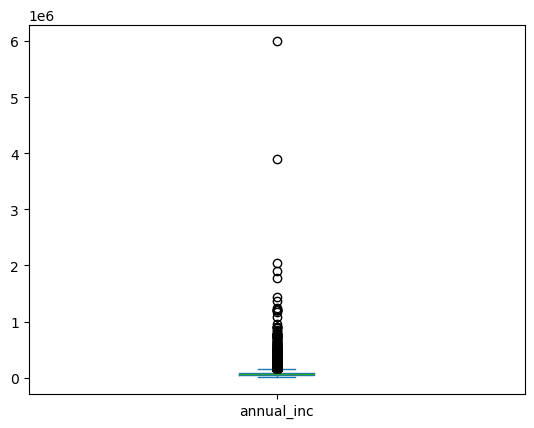

In [49]:
#checking for outliers using boxplot for annual_inc
loan['annual_inc'].plot.box()

In [50]:
#removing the outliers by using quantile of 0.98 for annual_inc as few outliers as causing huge difference of values
quantile_inc = loan['annual_inc'].quantile(0.98)
loan = loan[loan['annual_inc'] <= quantile_inc]

<Axes: >

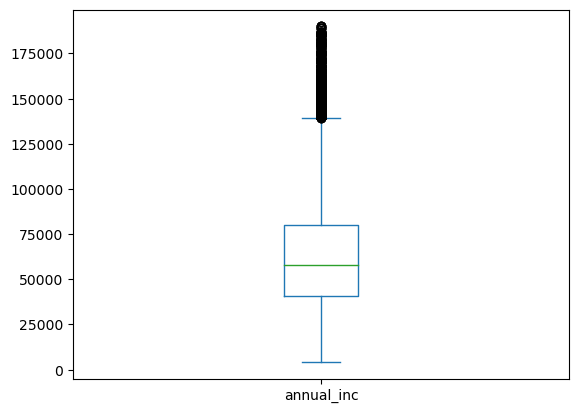

In [51]:
#rechecking if it has resolved the issue of outliers for annual_inc with box plot
loan['annual_inc'].plot.box()

In [52]:
#checking the shape of data to see the no.of rows and columns
loan.shape

(36748, 22)

<Axes: >

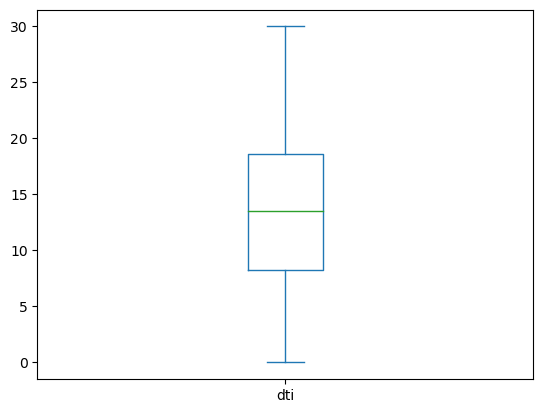

In [54]:
#checking for outliers using boxplot for dti
loan['dti'].plot.box()

The outliers in annual income was high causing the scale to move to higher value but by using an percentile of 0.98, the outliers has been drastically reduced. Outliers in other measures are in acceptable range.


## Univariate Analysis

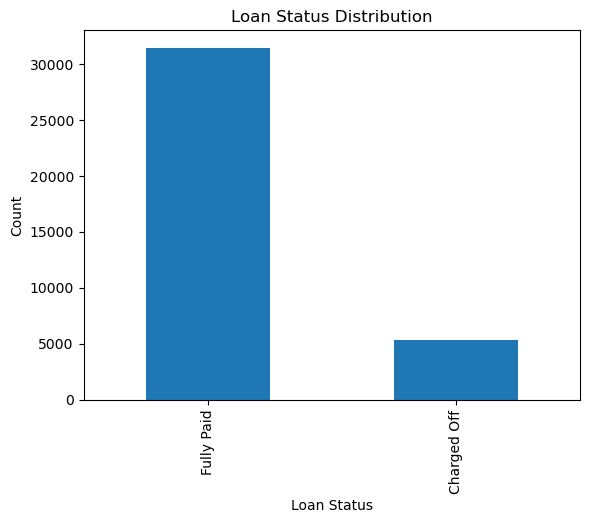

In [58]:
# Creating a bar plot with loan_status for count of distribution of loan_status
loan_status_count = loan['loan_status'].value_counts()
loan_status_count.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()

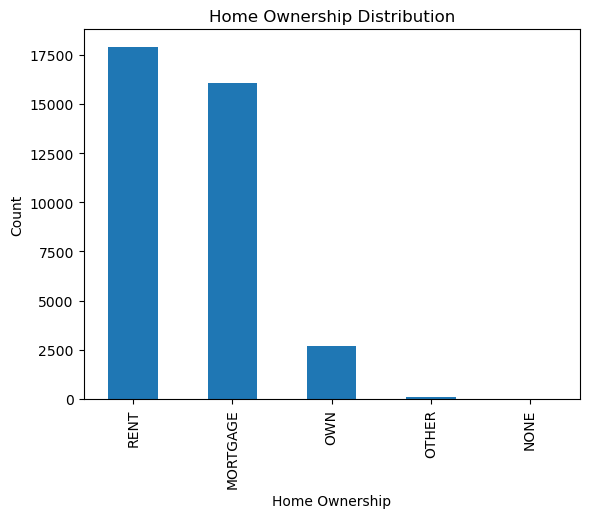

In [59]:
# Creating a bar plot with home_ownership for count of distribution as per home_ownership 
home_ownership_count = loan['home_ownership'].value_counts()
home_ownership_count.plot(kind='bar')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership Distribution')
plt.show()

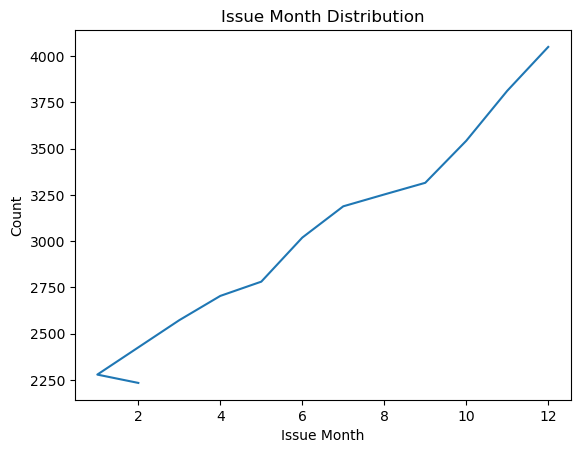

In [66]:
# Creating a bar plot with issue_month for count of distribution as per issue_month 
issue_month_count = loan['issue_month'].value_counts()
issue_month_count.plot(kind='line')
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.title('Issue Month Distribution')
plt.show()

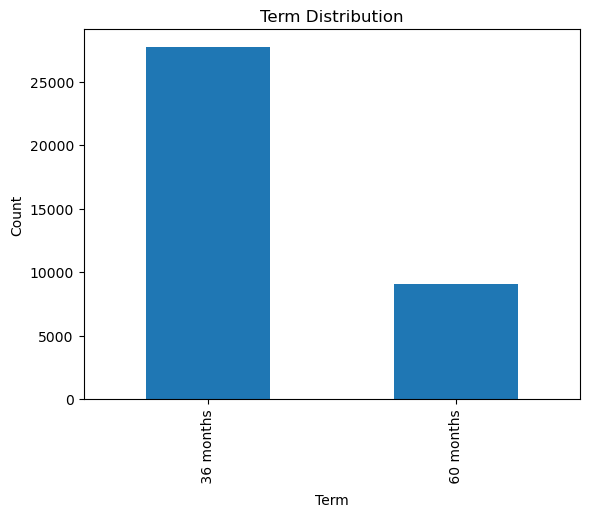

In [67]:
# Creating a bar plot with term for count of distribution as per term
term_count = loan['term'].value_counts()
term_count.plot(kind='bar')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term Distribution')
plt.show()

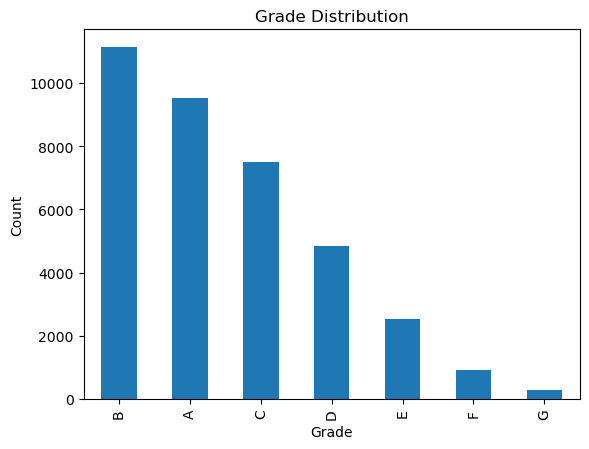

In [62]:
# Creating a bar plot with grade for count of distribution as per grade
grade_count = loan['grade'].value_counts()
grade_count.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.show()

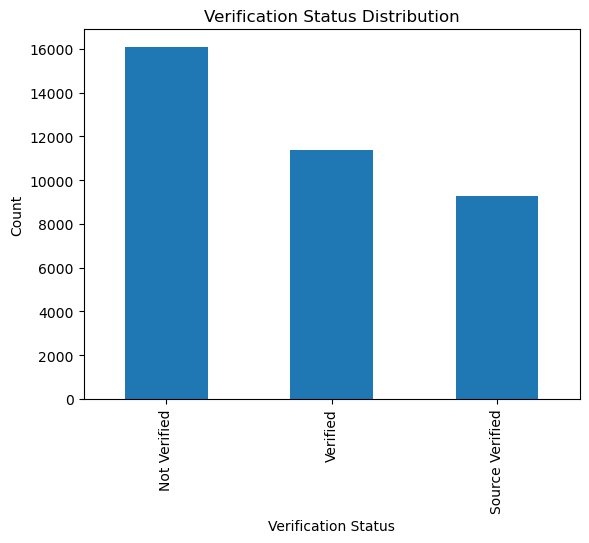

In [68]:
# Creating a bar plot with verification_status for count of distribution as per verification_status
verification_status_count = loan['verification_status'].value_counts()
verification_status_count.plot(kind='bar')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Verification Status Distribution')
plt.show()

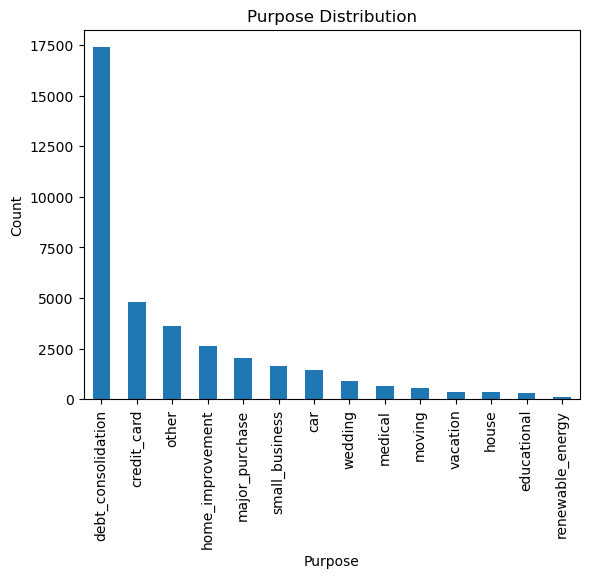

In [69]:
# Creating a bar plot with purpose for count of distribution as per purpose
purpose_count = loan['purpose'].value_counts()
purpose_count.plot(kind='bar')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Purpose Distribution')
plt.show()

## Bivariate Analysis

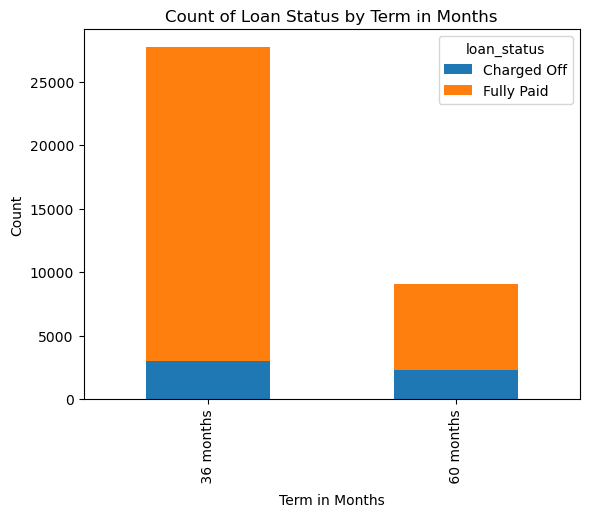

In [70]:
#creating a stacked bar chart with term and loan_status to see the distribution count
grouped = loan.groupby(['term', 'loan_status']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Term in Months')
plt.ylabel('Count')
plt.title('Count of Loan Status by Term in Months')
plt.show()

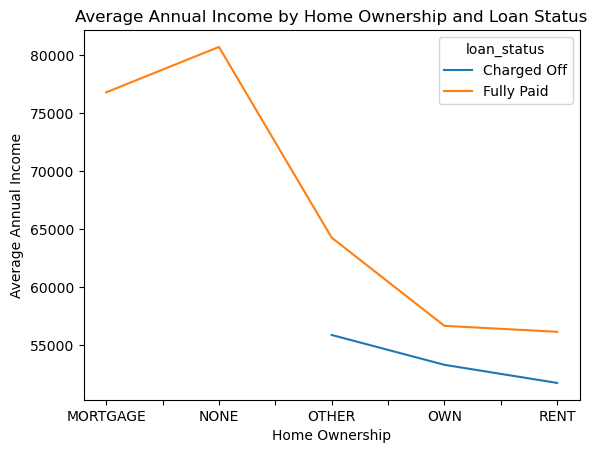

In [71]:
#creating a stacked line chart with term and loan_status to see the average annual income by home_ownership and loan_status
grouped = loan.groupby(['home_ownership', 'loan_status'])['annual_inc'].mean().unstack()
grouped.plot(kind='line', stacked=False)
plt.xlabel('Home Ownership')
plt.ylabel('Average Annual Income')
plt.title('Average Annual Income by Home Ownership and Loan Status')
plt.show()

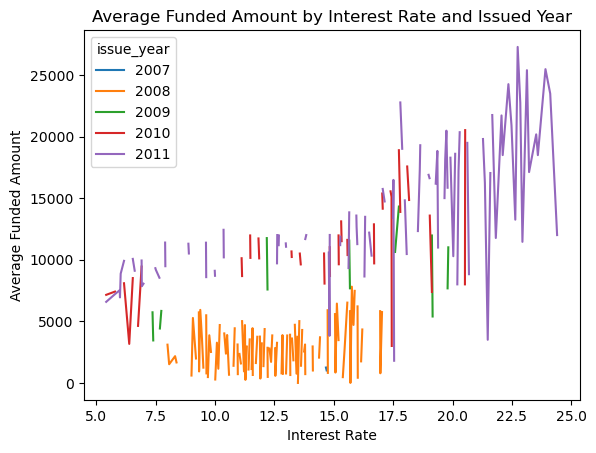

In [72]:
#creating a stacked line chart with int_rate and issue_year to see the average funded amount by interest rate and issued year
grouped = loan.groupby(['int_rate', 'issue_year'])['funded_amnt_inv'].mean().unstack()
grouped.plot(kind='line', stacked=False)
plt.xlabel('Interest Rate')
plt.ylabel('Average Funded Amount')
plt.title('Average Funded Amount by Interest Rate and Issued Year')
plt.show()

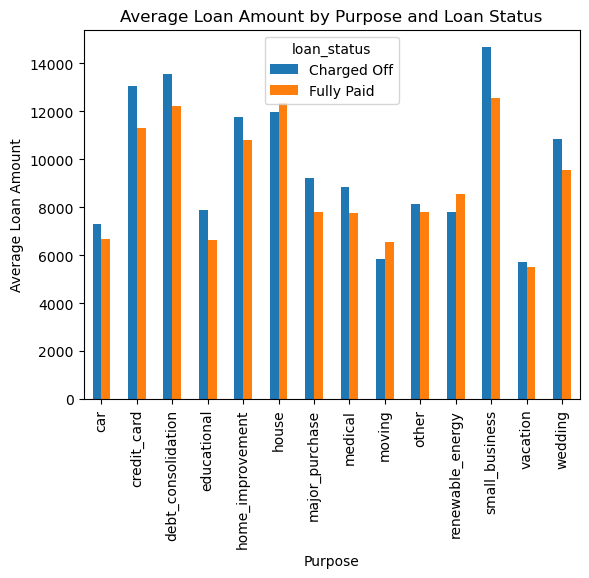

In [73]:
#creating a stacked bar chart with purpose and loan_status to see the average loan amount by purpose and loan status
grouped = loan.groupby(['purpose', 'loan_status'])['loan_amnt'].mean().unstack()
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Purpose')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Purpose and Loan Status')
plt.show()

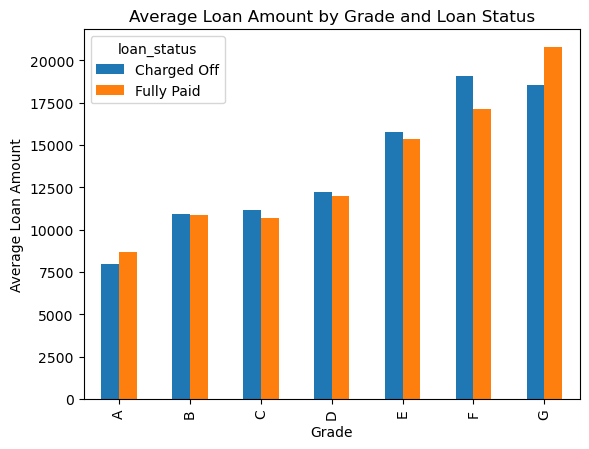

In [74]:
#creating a stacked bar chart with grade and loan_status to see the average loan amount by grade and loan status
grouped = loan.groupby(['grade', 'loan_status'])['loan_amnt'].mean().unstack()
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Grade')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Grade and Loan Status')
plt.show()

## Multivariate Analysis

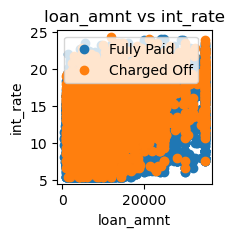

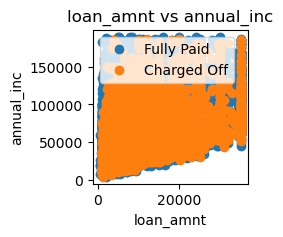

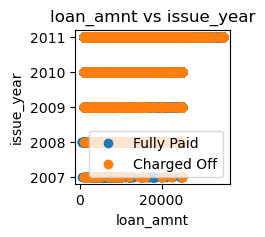

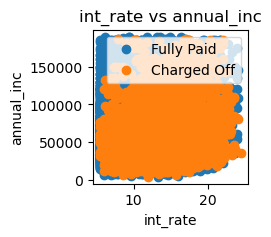

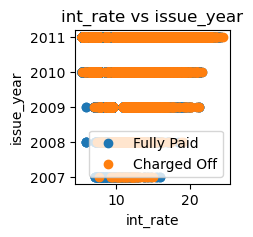

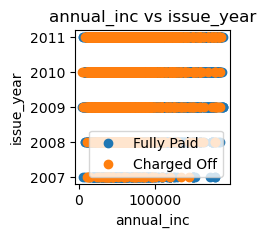

In [75]:
# Creating a scatter plot with numeric columns loan_amnt , int_rate, annual_inc and issue_year
numeric_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'issue_year']

# Looping through each pair of columns
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        # Creating a new figure
        plt.figure(figsize=(2, 2))

        # Creating a scatter plot for the pair of columns
        for loan_status in loan['loan_status'].unique():
            temp_df = loan[loan['loan_status'] == loan_status]
            plt.scatter(temp_df[numeric_columns[i]], temp_df[numeric_columns[j]], label=loan_status)

        
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.title(f'{numeric_columns[i]} vs {numeric_columns[j]}')
        plt.legend()
        plt.show()

## Observation

* People who rent and mortgage are more prone to defaulting than those who own a house.
* The loans provided at the later stages of months of the year are prone to defaulting.
* Loans provided for short term is more prone to defaulting than long term.
* Loads provided to G Grade is prone to defaulting.
* Loans provided to non verified cases are more prone to defaulting.
* Loans taken for debt consolidation is prone to defaulting.
* The annual income being less than 60K and those who stay in rented house are prone to defaulting.
* The defaulted loan amount and interest rate has been increasing over years, can try reducing interest to defaulting.
* Small Business are more prone to defaulting.
* Loan amount less than 20000 and interest rate less than 15% is mostly fully paid.
* Annual income more than 150000 and amount less than 20000 has been mostly dully paid.
* Loan amount charged off has increased a lot in 2011 along with interest higher than 15% .
* Loans given to people with salary less than 100000 is prone to defaulting over years.
